In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dhruv\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [2]:
df = pd.read_csv(r'C:\Users\dhruv\Downloads\datasets_4458_8204_winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking for null values in the dataset..

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Lets do some data visulization....

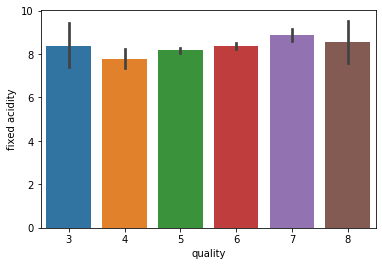

In [9]:
sns.barplot(y=df['fixed acidity'], x=df['quality'])

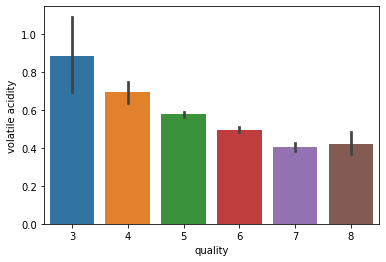

In [10]:
sns.barplot(y=df['volatile acidity'], x=df['quality'])

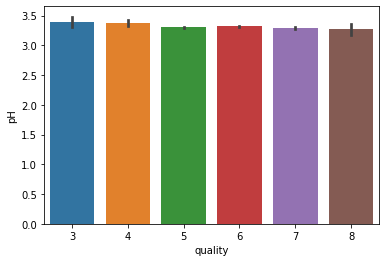

In [11]:
sns.barplot(y=df['pH'], x=df['quality'])

In [12]:
#Lets convert quality of wine into 1 and 0, where 1 indicate good quality and 0 indicate bad quality!!

def wine_quality(data):
    if data<6.5:
        return 0
    else:
        return 1
    
    

In [13]:
df['quality'] = df['quality'].apply(wine_quality)

In [15]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [16]:
#Lets divide data into X and Y

X = df.drop(['quality'], axis=1)
Y = df['quality']

In [20]:
#Lets split our X and Y into train and test dataset!!

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


In [22]:
#Lets scale our data for better performance !!

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.fit_transform(X_test)

Our data is ready now!!, lets start with models..

In [49]:
#Random Forrest Classifier 

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=20)


In [50]:
model_rfc.fit(X_train, Y_train)

SVC()

In [51]:
y_pred = model_rfc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, Y_test))

0.8925


In [52]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier
model_sgdc = SGDClassifier(penalty=None)

In [53]:
model_sgdc.fit(X_train, Y_train)
y_pred = model_sgdc.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.8725


In [54]:
#Support Vector Classifier

from sklearn.svm import SVC
model_svc = SVC()

In [55]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.8725


RandomForrestClassifier shows good accuracy compare to other two...

Now lets try to improve our models accuracy using GridCV

In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [58]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model_svc, param_grid=param, scoring='accuracy', cv=10)

In [59]:
grid_svc.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [60]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.3, 'kernel': 'rbf'}

In [64]:
model_svc2 = SVC(C= 1.4, gamma= 1.3, kernel= 'rbf')
model_svc2.fit(X_train, Y_train)
y_pred = model_svc2.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.88


Accuracy increase by 1% for SVC 

In [65]:
#Now lets try to do some evaluation for random forest model using cross validation.

rfc_eval = cross_val_score(estimator = model_rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.9016176470588235

Similarly, there is a little rise in accuracy from RandomForrestClassifier i.e, 89% to 90%

Let's try NeuralNetwork, inorder to improve the accuracy...

In [66]:
import tensorflow as tf
from tensorflow import keras

In [75]:

model_NN = keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

model_NN.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

model_NN.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1199/1199 [==============================] - 0s 125us/sample - loss: 0.4403 - acc: 0.8532
Epoch 2/100
1199/1199 [==============================] - 0s 40us/sample - loss: 0.3589 - acc: 0.8657
Epoch 3/100
1199/1199 [==============================] - 0s 37us/sample - loss: 0.3261 - acc: 0.8657
Epoch 4/100
1199/1199 [==============================] - 0s 40us/sample - loss: 0.3091 - acc: 0.8657
Epoch 5/100
1199/1199 [==============================] - 0s 39us/sample - loss: 0.2982 - acc: 0.8666
Epoch 6/100
1199/1199 [==============================] - 0s 40us/sample - loss: 0.2898 - acc: 0.8682
Epoch 7/100
1199/1199 [==============================] - 0s 39us/sample - loss: 0.2830 - acc: 0.8699
Epoch 8/100
1199/1199 [==============================] - 0s 38us/sample - loss: 0.2763 - acc: 0.8841
Epoch 9/100
1199/1199 [==============================] - 0s 42us/sample - loss: 0.2712 - acc: 0.8957
Epoch 10/100
1199/1199 [==============================] - 0s 40us/sample - loss: 0.2668 - 

1199/1199 [==============================] - 0s 38us/sample - loss: 0.1635 - acc: 0.9324
Epoch 82/100
1199/1199 [==============================] - 0s 38us/sample - loss: 0.1642 - acc: 0.9308
Epoch 83/100
1199/1199 [==============================] - 0s 37us/sample - loss: 0.1612 - acc: 0.9358
Epoch 84/100
1199/1199 [==============================] - 0s 33us/sample - loss: 0.1608 - acc: 0.9358
Epoch 85/100
1199/1199 [==============================] - 0s 38us/sample - loss: 0.1605 - acc: 0.9399
Epoch 86/100
1199/1199 [==============================] - 0s 36us/sample - loss: 0.1590 - acc: 0.9324
Epoch 87/100
1199/1199 [==============================] - 0s 37us/sample - loss: 0.1581 - acc: 0.9366
Epoch 88/100
1199/1199 [==============================] - 0s 35us/sample - loss: 0.1573 - acc: 0.9366
Epoch 89/100
1199/1199 [==============================] - 0s 37us/sample - loss: 0.1567 - acc: 0.9349
Epoch 90/100
1199/1199 [==============================] - 0s 38us/sample - loss: 0.1564 - acc: 

In [76]:
model_NN.evaluate(X_test, Y_test)

400/400 [==============================] - 0s 170us/sample - loss: 0.3553 - acc: 0.8600


[0.3553113055229187, 0.86]